In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.tri import Triangulation

import ast

In [3]:
def parse_results(file_name):
    grid_search_results = []
    with open(file_name, 'r') as file:
        inlist = 0
        for line in file.readlines():
            if line[0:4] == '----':
                grid_search_results.append([])
                continue

            if line[0] == '(':
                fixed_line = '[' + line.strip().replace(') (', '), (') + ']'
                params = ast.literal_eval(fixed_line)
                nested = [list(zip(key.split(','), np.array(val).flatten())) for (key, val) in params]
                unnested = [item for sublist in nested for item in sublist]
                grid_search_results[-1].append({key: val for (key, val) in unnested})
                grid_search_results[-1].append([])
                continue

            result = line

            if result[0] == '[':
                grid_search_results[-1][-1].append(ast.literal_eval(result))
                continue

    grid_search_results = [(params, np.array(values)) for params, values in grid_search_results]
    return grid_search_results

In [14]:
hyp_res = parse_results('grid_search_results/tom_hyp_overall-liking_400_2.txt')
euc_res = parse_results('grid_search_results/tom_euc_overall-liking_400.txt')

In [15]:
param_grid = {
    'model_type': ['euc'],
    'num_hidden_layers': [0,1,2,4],
    'layer_size': [2,4,8,16,32,64,128],
    'lr': [0.003],
    'weight_decay': [0.0005],
    'batch_size': [1024],
    'epochs': [400],
    'curvature': [-1]
}

param_grid = {
    'model_type': ['hyp'],
    'num_hidden_layers': [0,1,2,4],
    'layer_size': [2,4,8,16,32,64,128],
    'lr': [0.005],
    'weight_decay': [0.001],
    'batch_size': [1024],
    'epochs': [400],
    'curvature': [-1]
}

In [16]:
hyp_params = np.array([p for p, _ in hyp_res])
hyp_values = np.array([v for _, v in hyp_res])

euc_params = np.array([p for p, _ in euc_res])
euc_values = np.array([v for _, v in euc_res])

hyp_values.shape

(28, 4, 400)

In [21]:
IN_SIZE = 89
OUT_SIZE = 1

NUM_HIDDEN_LAYERS = [0,1,2,4]
LAYER_SIZE = [2,4,8,16,32,64,128]
LR = ['0.0075']

In [22]:
num_hidden_layers = np.array(NUM_HIDDEN_LAYERS).repeat(len(LAYER_SIZE))
layer_size = np.tile(LAYER_SIZE, len(NUM_HIDDEN_LAYERS))

naive_sizes = (num_hidden_layers * layer_size**2).flatten()
real_sizes = (num_hidden_layers * layer_size**2).flatten() + ((np.zeros_like(num_hidden_layers) + (IN_SIZE+OUT_SIZE))*layer_size).flatten()

-3.0935439908923748 -3.2134255143825925
-1.8181595478441397 -1.7842161280261362


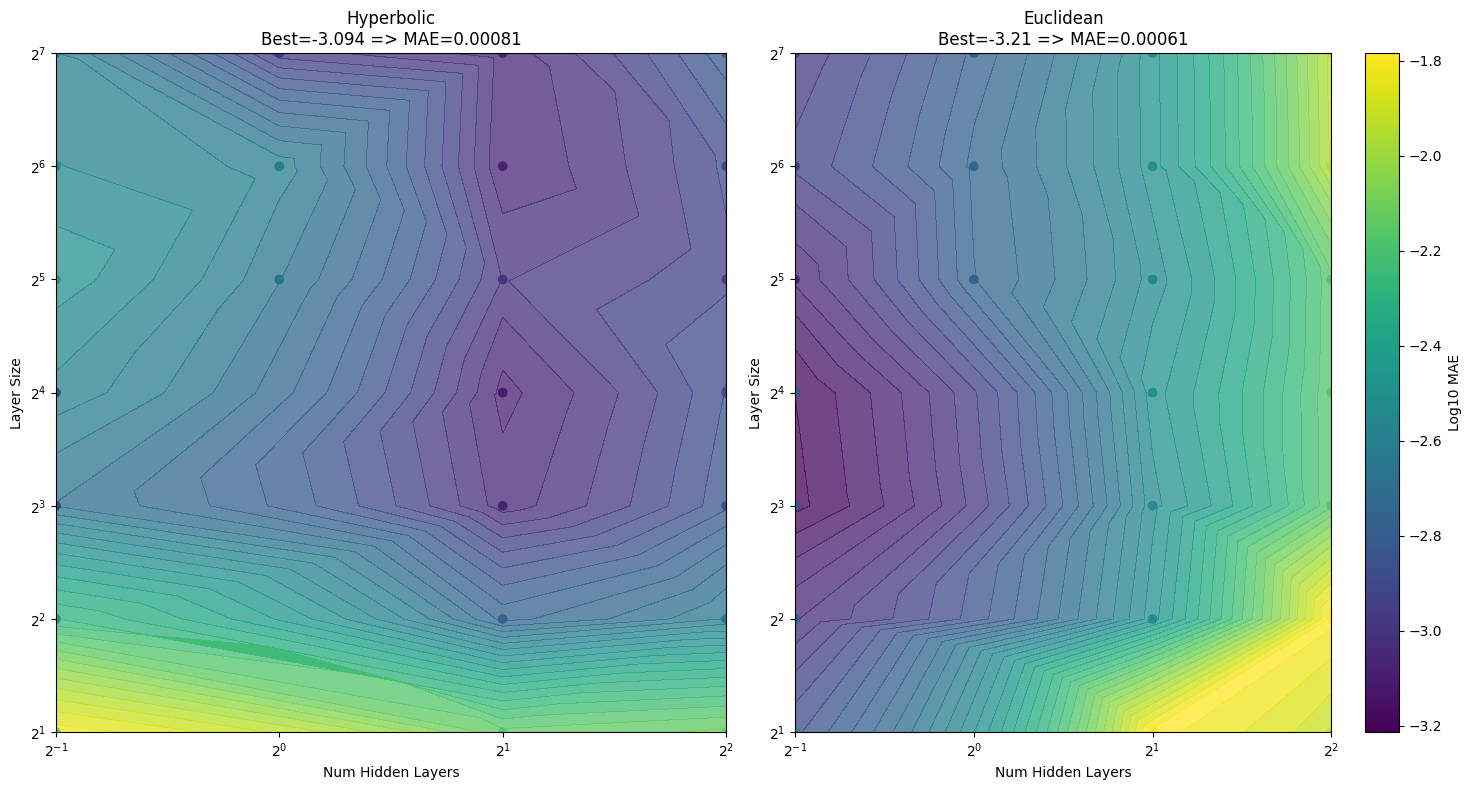

In [31]:
for i, lr in enumerate(LR):
    hyp_data = np.log10(hyp_values.mean(axis=1)[:,399].reshape(-1,len(LR))[:,i])
    euc_data = np.log10(euc_values.mean(axis=1)[:,199].reshape(-1,len(LR))[:,i])

    min_val = min(np.min(hyp_data), np.min(euc_data))
    max_val = max(np.max(hyp_data), np.max(euc_data))

    print(np.min(hyp_data), np.min(euc_data))
    print(np.max(hyp_data), np.max(euc_data))

    cmap = plt.cm.viridis
    norm = Normalize(vmin=min_val, vmax=max_val)

    num_hidden_layers_adjust = np.append(np.zeros(11)+0.5, num_hidden_layers[11:])

    mesh = Triangulation(num_hidden_layers_adjust, layer_size)  #create tri mesh


    plt.figure(figsize=(15,8))
    # plt.suptitle(f'Hyperbolic     |     Euclidean', fontsize=16, y=1)

    plt.subplot(121)
    plt.tricontourf(mesh, hyp_data, levels=40, cmap=cmap, norm=norm, alpha=0.75)
    plt.scatter(num_hidden_layers_adjust, layer_size, c=hyp_data, cmap=cmap, norm=norm)

    plt.title(f'Hyperbolic\nBest={np.min(hyp_data):.3f} => MAE={np.power(10, np.min(hyp_data)):.5f}')
    plt.xlabel('Num Hidden Layers')
    plt.ylabel('Layer Size')

    plt.xscale('log', base=2)
    plt.yscale('log', base=2)


    plt.subplot(122)
    euc_contourf = plt.tricontourf(mesh, euc_data, levels=40, cmap=cmap, norm=norm, alpha=0.75)
    euc_scatter = plt.scatter(num_hidden_layers_adjust, layer_size, c=euc_data, cmap=cmap, norm=norm)
    plt.colorbar(euc_scatter, label='Log10 MAE')


    plt.title(f'Euclidean\nBest={np.min(euc_data):.3} => MAE={np.power(10, np.min(euc_data)):.5f}')
    plt.xlabel('Num Hidden Layers')
    plt.ylabel('Layer Size')

    plt.xscale('log', base=2)
    plt.yscale('log', base=2)

    plt.tight_layout()
    plt.show()

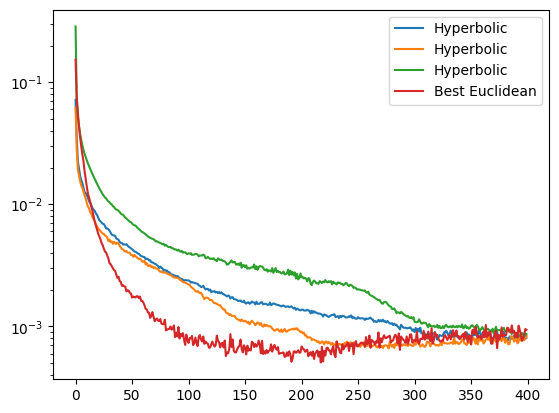

In [30]:

# plt.plot(hyp_values[12,0])
# plt.plot(hyp_values[12,1])
# plt.plot(hyp_values[12,2])
# plt.plot(euc_values[3,0])
# plt.plot(euc_values[3,1])
# plt.plot(euc_values[3,2])

# plt.plot(hyp_values.mean(axis=1)[12])
# plt.plot(euc_values.mean(axis=1)[3])

# hyp_min = (0, 1, -1)
# euc_min = (0, 1, -1)
# for i in range(28):
#     plt.plot(hyp_values.mean(axis=1)[i])
#     plt.plot(euc_values.mean(axis=1)[i])

#     print(i)
#     print(hyp_values.mean(axis=1)[i].min(), hyp_values.mean(axis=1)[i].argmin())
#     print(euc_values.mean(axis=1)[i].min(), euc_values.mean(axis=1)[i].argmin())

#     if hyp_values.mean(axis=1)[i].min() < hyp_min[1]:
#         hyp_min = (i, hyp_values.mean(axis=1)[i].min(), hyp_values.mean(axis=1)[i].argmin())
#     if euc_values.mean(axis=1)[i].min() < euc_min[1]:
#         euc_min = (i, euc_values.mean(axis=1)[i].min(), euc_values.mean(axis=1)[i].argmin())

# plt.plot(hyp_values.mean(axis=1)[18])
# plt.plot(euc_values.mean(axis=1)[2])

plt.plot(hyp_values.mean(axis=1)[17])
plt.plot(hyp_values.mean(axis=1)[19])
plt.plot(hyp_values.mean(axis=1)[20])
plt.plot(euc_values.mean(axis=1)[2])

plt.legend(['Hyperbolic','Hyperbolic','Hyperbolic', 'Best Euclidean'])

plt.yscale('log')
plt.show()

In [13]:
euc_min

(2, 0.00085997846, 95)